<a href="https://colab.research.google.com/github/rkti498/e_shikaku/blob/main/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E8%87%AA%E5%AD%A6%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

youtubeとネットで大体の理論を学習
https://www.youtube.com/watch?v=2IB7vkfGeAA
https://qiita.com/renesisu727/items/1cf367d17b46237f9c7a




In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 6.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=24b7b45ca60224faee72b7b75223234bbdf80127347b5c350f6616eeaca334b9
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [43]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)


In [22]:
print(y_train)
print(y_test)

[1 2 2 2 1 0 1 0 2 1 2 1 0 2 0 1 1 0 2 1 2 1 1 0 1 0 0 2 0 2 1 0 1 2 0 1 1
 2 1 0 0 0 1 1 2 1 2 2 1 2 0 2 1 1 2 0 2 2 0 2 1 0 0 0 0 2 0 1 0 2 2 0 2 1
 1 2 0 0 0 1 0 1 0 0 2 1 2 1 0 2 0 2 0 1 0 2 2 2 1 1 1 1 0 0 0 2 0 1 2 1 1
 2 0 1 1 1 0 1 2 2]
[0 0 1 0 1 1 0 2 1 2 2 0 2 0 0 2 2 2 0 1 2 2 2 0 2 1 1 1 2 0]


In [44]:
model = LinearSVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))

print(model.predict(X_test))

0.9066666666666666
[1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1]


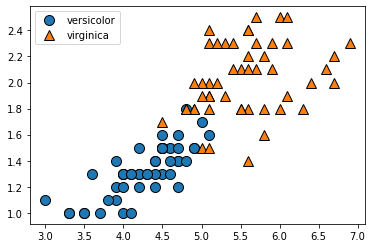

In [35]:
iris = load_iris()
X = iris.data[50:, 2:]
y = iris.target[50:] - 1
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['versicolor', 'virginica'], loc='best')
p lt.show()


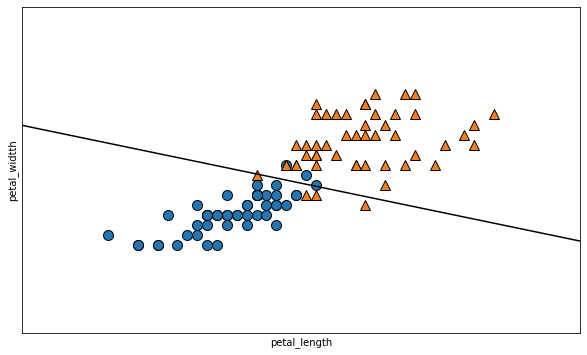

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


model = LinearSVC().fit(X_train, y_train)

def plot_separator(model):
  plt.figure(figsize=(10, 6)  )
  mglearn.plots.plot_2d_separator(model, X)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
  plt.xlabel('petal_length')
  plt.ylabel('petal_widtth')
  plt.show()

plot_separator(model)

# きれいに分割できている。

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


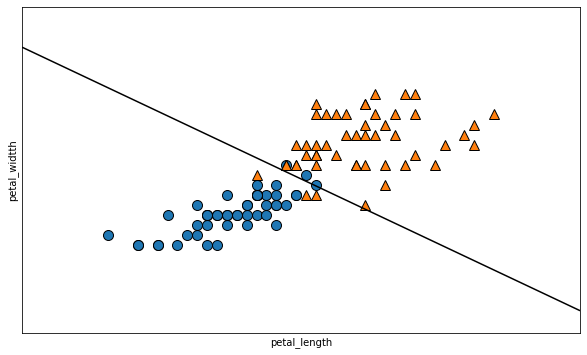

In [51]:
# Cを変化させてみる。（デフォルトはC=1だった）


# C=50
model_50 = LinearSVC(C=50).fit(X_train, y_train)
plot_separator(model_50 )

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


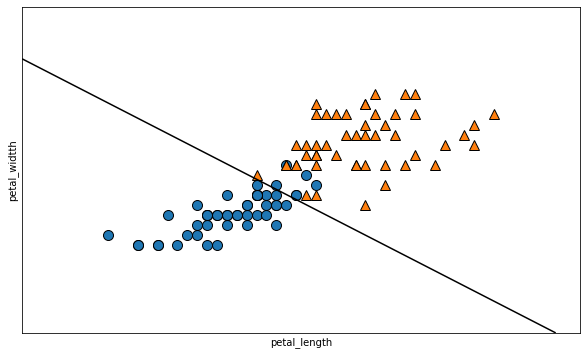

In [56]:
# C=100

model_100 = LinearSVC(C=100).fit(X_train, y_train)
plot_separator(model_100 )

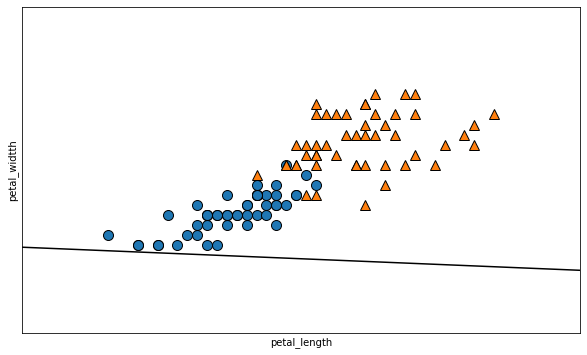

In [59]:
# C=0.01  減らした場合

model_001 = LinearSVC(C=0.01).fit(X_train, y_train)
plot_separator(model_001)

In [ ]:
# 比較

In [53]:
print(f"score on train : {model.score(X_train, y_train):.2f}")   # print("score on train : {:.2f}".format(model.score(X_train, y_train))) 
print(f"score on test : {model.score(X_test, y_test):.2f}")      # print("score on test : {:.2f}".format(model.score(X_test, y_test)))

score on train : 0.91
score on test : 1.00


In [54]:
print(f"score on train : {model_50.score(X_train, y_train):.2f}") 
print(f"score on test : {model_50.score(X_test, y_test):.2f}")  

score on train : 0.92
score on test : 1.00


In [57]:
# trainのスコアが上がっているのに、testのスコアが下がっているので、過学習しているといえる。

print(f"score on train : {model_100.score(X_train, y_train):.2f}") 
print(f"score on test : {model_100.score(X_test, y_test):.2f}")  

score on train : 0.93
score on test : 0.96


In [60]:
# Cを減らしすぎた結果、学習がほとんどできていない。

print(f"score on train : {model_001.score(X_train, y_train):.2f}") 
print(f"score on test : {model_001.score(X_test, y_test):.2f}")  

score on train : 0.51
score on test : 0.48
